# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config Completer.use_jedi = False
%matplotlib inline

from IPython.display import display
pd.options.display.max_columns = None

from sklearn.linear_model import LinearRegression

# Data

In [2]:
df = pd.read_csv("Aqram_Project1_FinalClean_data.csv")

In [3]:
df

,MS SubClass,Lot Frontage,Lot Area,Street,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkFace,Mas Vnr Type_CBlock,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.000000,31770,1,1,0,6,5,1960,1960,112.0,2,2,3,4,4,4,639.0,1,0.0,441.0,1080.0,1,1,1656,0,0,1656,1.0,0.0,1,0,3,1,2,7,2,4,1960.0,3,2.0,528.0,3,3,1,210,62,0,0,0,0,0,5,2010,215000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0

In [4]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Model

### Ridge

In [5]:
from sklearn.linear_model import Ridge

In [6]:
ridge_model= Ridge(alpha=10)

In [7]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [8]:
ridge_test_predictions = ridge_model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [10]:
MAE_Ridge = mean_absolute_error(y_test, ridge_test_predictions)
MSE_Ridge = mean_squared_error(y_test, ridge_test_predictions)
RMSE_Ridge = np.sqrt(MSE_Ridge)

In [11]:
MAE_Ridge

14214.309274147432

In [12]:
MSE_Ridge

368575341.6928781

In [13]:
RMSE_Ridge

19198.316116078466

In [14]:
ridge_model.coef_

array([-3.14377890e+03,  1.80033769e+03,  3.50788570e+03,  1.05448949e+03,
       -7.17364923e+01, -8.41063297e+02,  1.02552631e+04,  4.61927894e+03,
        1.05505082e+04,  3.88603036e+02,  4.03531490e+03,  3.43044383e+03,
        7.05596274e+01,  3.44028526e+03, -2.36151264e+03,  3.99047163e+03,
        3.43306759e+02,  6.06984072e+03,  5.94813195e+02,  1.52454878e+02,
       -1.78850440e+03,  4.52116872e+03,  1.90364607e+03, -8.78323421e+02,
        9.82023109e+03,  7.36963584e+03, -4.25984506e+02,  1.43654740e+04,
        1.05612900e+03, -2.53140737e+02,  5.20027627e+01,  1.22956841e+03,
       -3.21959769e+03, -1.74980623e+03,  3.66600966e+03,  8.70682962e+02,
        4.21813017e+02,  9.46119388e+02, -3.18261725e+02,  8.88944454e+02,
        2.57008153e+03,  3.75268165e+03, -8.49536011e+02,  9.85913244e+01,
        3.09118094e+01,  1.65855377e+03,  1.31965260e+03,  1.30679546e+03,
       -4.57815744e+01,  1.70624817e+03, -9.11218513e+01,  2.82819783e+02,
        3.40709335e+01, -

In [15]:
x = ridge_model.coef_
x[x>0]

array([1.80033769e+03, 3.50788570e+03, 1.05448949e+03, 1.02552631e+04,
       4.61927894e+03, 1.05505082e+04, 3.88603036e+02, 4.03531490e+03,
       3.43044383e+03, 7.05596274e+01, 3.44028526e+03, 3.99047163e+03,
       3.43306759e+02, 6.06984072e+03, 5.94813195e+02, 1.52454878e+02,
       4.52116872e+03, 1.90364607e+03, 9.82023109e+03, 7.36963584e+03,
       1.43654740e+04, 1.05612900e+03, 5.20027627e+01, 1.22956841e+03,
       3.66600966e+03, 8.70682962e+02, 4.21813017e+02, 9.46119388e+02,
       8.88944454e+02, 2.57008153e+03, 3.75268165e+03, 9.85913244e+01,
       3.09118094e+01, 1.65855377e+03, 1.31965260e+03, 1.30679546e+03,
       1.70624817e+03, 2.82819783e+02, 3.40709335e+01, 4.03306372e+02,
       1.09465798e+03, 3.54194060e+02, 1.55236596e+03, 1.23695473e+03,
       3.38267671e+02, 1.55726922e+03, 7.42314999e+02, 2.17430351e+03,
       5.42529083e+02, 1.94245998e+03, 1.64236277e+02, 1.82013902e+03,
       2.08542944e+03, 5.36489578e+03, 6.40359057e+01, 7.66295571e+02,
      

### Lasso

In [16]:
from sklearn.linear_model import Lasso

In [17]:
lasso_model = Lasso(alpha=10)

In [18]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=10)

In [19]:
pred_test_lasso = lasso_model.predict(X_test)

In [20]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [21]:
MAE_Lasso

14239.441659668215

In [22]:
MSE_Lasso

369332485.68801755

In [23]:
RMSE_Lasso

19218.025020485784

In [24]:
lasso_model.coef_

array([-3.12634643e+03,  1.76062483e+03,  3.48999297e+03,  1.04739916e+03,
       -7.49268964e+01, -7.93854541e+02,  1.03496928e+04,  4.70432113e+03,
        1.12157491e+04,  2.91874041e+02,  4.06394221e+03,  3.41374681e+03,
        3.64159450e+01,  3.36277628e+03, -2.36927726e+03,  3.99604239e+03,
        2.74732882e+02,  7.90160058e+03,  6.29305405e+02,  8.17344820e+02,
       -0.00000000e+00,  2.68932700e+03,  1.89584826e+03, -8.90443985e+02,
        1.31734899e+04,  1.13055355e+04, -0.00000000e+00,  1.07100070e+04,
        1.05045654e+03, -2.44913692e+02, -6.85252215e+01,  1.13241396e+03,
       -3.27895289e+03, -1.71645605e+03,  3.62049856e+03,  6.72170386e+02,
        3.72029696e+02,  9.32106008e+02, -0.00000000e+00,  8.43059548e+02,
        2.53673601e+03,  3.65235104e+03, -7.51769513e+02, -0.00000000e+00,
        0.00000000e+00,  1.63621725e+03,  1.29430495e+03,  1.33833967e+03,
       -5.32518286e+01,  1.69618441e+03, -8.99996928e+01,  2.70298695e+02,
        2.55334702e+01, -

In [25]:
x = ridge_model.coef_
x[x>0]

array([1.80033769e+03, 3.50788570e+03, 1.05448949e+03, 1.02552631e+04,
       4.61927894e+03, 1.05505082e+04, 3.88603036e+02, 4.03531490e+03,
       3.43044383e+03, 7.05596274e+01, 3.44028526e+03, 3.99047163e+03,
       3.43306759e+02, 6.06984072e+03, 5.94813195e+02, 1.52454878e+02,
       4.52116872e+03, 1.90364607e+03, 9.82023109e+03, 7.36963584e+03,
       1.43654740e+04, 1.05612900e+03, 5.20027627e+01, 1.22956841e+03,
       3.66600966e+03, 8.70682962e+02, 4.21813017e+02, 9.46119388e+02,
       8.88944454e+02, 2.57008153e+03, 3.75268165e+03, 9.85913244e+01,
       3.09118094e+01, 1.65855377e+03, 1.31965260e+03, 1.30679546e+03,
       1.70624817e+03, 2.82819783e+02, 3.40709335e+01, 4.03306372e+02,
       1.09465798e+03, 3.54194060e+02, 1.55236596e+03, 1.23695473e+03,
       3.38267671e+02, 1.55726922e+03, 7.42314999e+02, 2.17430351e+03,
       5.42529083e+02, 1.94245998e+03, 1.64236277e+02, 1.82013902e+03,
       2.08542944e+03, 5.36489578e+03, 6.40359057e+01, 7.66295571e+02,
      

# Choosing alpha value with Cross-Validation

### Cross Validate Ridge with GridSearchCV

In [26]:
from sklearn.linear_model import Ridge

In [27]:
base_ridge_model = Ridge()

In [28]:
ridge_param_grid = {'alpha':[0.1,1,5,10,50,100]}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# fill the estimator and parameters that we want to use
ridge_grid_model = GridSearchCV(estimator=base_ridge_model,
                          param_grid=ridge_param_grid,
                          scoring='neg_mean_squared_error',
                          cv=100,
                          verbose=2)

In [31]:
# ask the Machine Learning to learn and train the data
ridge_grid_model.fit(X_train,y_train)

Fitting 100 folds for each of 6 candidates, totalling 600 fits
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] .

[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .

[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .

[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.0s
[CV] alpha=5 .........................................................
[CV] .

[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] .

[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] alpha=10 ........................................................
[CV] .

[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.0s
[CV] a

[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] .

[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    4.7s finished


GridSearchCV(cv=100, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [32]:
# to find the best alpha among the listed alphas above
ridge_grid_model.best_estimator_

Ridge(alpha=100)

In [33]:
ridge_grid_model.best_params_

{'alpha': 100}

In [35]:
ridge_grid_model.alpha_

AttributeError: 'GridSearchCV' object has no attribute 'alpha_'

In [36]:
ridgeGrid_test_predictions = ridge_grid_model.predict(X_test)

In [37]:
MAE_ridgeGrid = mean_absolute_error(y_test,ridgeGrid_test_predictions)
MSE_ridgeGrid = mean_squared_error(y_test,ridgeGrid_test_predictions)
RMSE_ridgeGrid = np.sqrt(MSE_ridgeGrid)

In [38]:
MAE_ridgeGrid

14039.970403964264

In [39]:
MSE_ridgeGrid

364244149.2444341

In [40]:
RMSE_ridgeGrid

19085.18140454615

In [41]:
ridge_grid_model.coef_

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

### Cross Validate Ridge with RidgeCV

In [42]:
from sklearn.linear_model import RidgeCV

In [43]:
ridge_cv_model = RidgeCV(alphas=(0.1,1,5,10,50,100), scoring="neg_mean_absolute_error")

In [44]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   1. ,   5. ,  10. ,  50. , 100. ]),
        scoring='neg_mean_absolute_error')

In [45]:
ridge_cv_model.best_estimator_

AttributeError: 'RidgeCV' object has no attribute 'best_estimator_'

In [46]:
ridge_cv_model.best_params_

AttributeError: 'RidgeCV' object has no attribute 'best_params_'

In [47]:
ridge_cv_model.alpha_

100.0

In [48]:
ridgeCV_test_predictions = ridge_cv_model.predict(X_test)

In [49]:
MAE_ridgeCV = mean_absolute_error(y_test, ridgeCV_test_predictions)
MSE_ridgeCV = mean_squared_error(y_test, ridgeCV_test_predictions)
RMSE_ridgeCV = np.sqrt(MSE_ridgeCV)

In [50]:
MAE_ridgeCV

14039.970403964991

In [51]:
MSE_ridgeCV

364244149.2444494

In [52]:
RMSE_ridgeCV

19085.181404546547

In [53]:
ridge_cv_model.coef_

array([-3.27665001e+03,  2.04068255e+03,  3.27316629e+03,  9.10662238e+02,
        1.65079985e+02, -7.24771420e+02,  9.68827705e+03,  3.99561259e+03,
        7.13970281e+03,  9.87815373e+02,  3.82689911e+03,  3.64220334e+03,
        1.47151569e+02,  3.46461727e+03, -2.12032829e+03,  3.91196580e+03,
        6.95932814e+02,  5.89910106e+03,  3.46388629e+02,  3.55662081e+02,
       -1.36797090e+03,  4.88425059e+03,  1.86199335e+03, -6.17925241e+02,
        8.72840086e+03,  5.67105202e+03, -5.51575086e+02,  1.19486783e+04,
        1.15755772e+03, -3.16100240e+02,  1.01915375e+03,  1.74938412e+03,
       -2.50599555e+03, -1.76424485e+03,  3.92087135e+03,  1.85531556e+03,
        8.05887319e+02,  1.24672638e+03, -8.42379326e+02,  1.16500799e+03,
        2.59745840e+03,  4.02823316e+03, -7.73063898e+02, -5.37621630e+00,
        3.08214899e+02,  1.77274424e+03,  1.47993912e+03,  9.98800743e+02,
        8.70067605e+00,  1.61737189e+03,  1.28594188e+01,  2.52415823e+02,
        2.84532239e+01, -

In [54]:
x = ridge_cv_model.coef_
x[x>0]

array([2.04068255e+03, 3.27316629e+03, 9.10662238e+02, 1.65079985e+02,
       9.68827705e+03, 3.99561259e+03, 7.13970281e+03, 9.87815373e+02,
       3.82689911e+03, 3.64220334e+03, 1.47151569e+02, 3.46461727e+03,
       3.91196580e+03, 6.95932814e+02, 5.89910106e+03, 3.46388629e+02,
       3.55662081e+02, 4.88425059e+03, 1.86199335e+03, 8.72840086e+03,
       5.67105202e+03, 1.19486783e+04, 1.15755772e+03, 1.01915375e+03,
       1.74938412e+03, 3.92087135e+03, 1.85531556e+03, 8.05887319e+02,
       1.24672638e+03, 1.16500799e+03, 2.59745840e+03, 4.02823316e+03,
       3.08214899e+02, 1.77274424e+03, 1.47993912e+03, 9.98800743e+02,
       8.70067605e+00, 1.61737189e+03, 1.28594188e+01, 2.52415823e+02,
       2.84532239e+01, 6.97422728e+02, 1.02930481e+03, 4.35127882e+02,
       1.87217860e+02, 1.65753920e+03, 1.33302317e+03, 4.14610825e+00,
       2.60313306e+02, 1.24129055e+03, 8.15841023e+02, 6.97429228e+01,
       2.26693110e+03, 5.65156996e+02, 2.00049110e+03, 1.49743369e+02,
      

### Cross Validate Lasso with GridSearchCV

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lasso_model = Lasso()

In [57]:
lasso_param_grid = {'alpha':[0.1,1,5,10,50,100]}

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=lasso_param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [60]:
lasso_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236107567327.88913, tolerance: 762903015.5598
  positive)


[CV] ........................................ alpha=0.1, total=   0.2s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.2s
[CV] alpha=0.1 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219459006380.89102, tolerance: 755010762.2143075
  positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238912311554.45773, tolerance: 771274412.4309272
  positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90828961099.04413, tolerance: 753183710.056815
  positive)


[CV] ........................................ alpha=0.1, total=   0.2s
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.2s
[CV] alpha=0.1 .......................................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121901700487.10748, tolerance: 769188816.6503198
  positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114710742420.56058, tolerance: 762903015.5598
  positive)


[CV] ........................................ alpha=0.1, total=   0.2s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.2s
[CV] alpha=1 .........................................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139853563276.30176, tolerance: 755010762.2143075
  positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129073897639.29999, tolerance: 771274412.4309272
  positive)


[CV] .......................................... alpha=1, total=   0.2s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.2s
[CV] alpha=1 .........................................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5692904959.836731, tolerance: 753183710.056815
  positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2559256207.7993774, tolerance: 769188816.6503198
  positive)


[CV] .......................................... alpha=1, total=   0.2s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.2s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.2s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.2s
[CV] alpha=5 .........................................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5093289286.067688, tolerance: 755010762.2143075
  positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3661220921.1691284, tolerance: 771274412.4309272
  positive)


[CV] .......................................... alpha=5, total=   0.2s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.2s
[CV] alpha=5 .........................................................
[CV] .......................................... alpha=5, total=   0.2s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.2s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.2s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.2s
[CV] alpha=10 ........................................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1064458716.659729, tolerance: 771274412.4309272
  positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996195521.1384888, tolerance: 753183710.056815
  positive)


[CV] ......................................... alpha=10, total=   0.2s
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.2s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.1s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.1s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.1s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.1s
[CV] alpha=50 ........................................................
[CV] ......................................... alpha=50, total=   0.1s
[CV] alpha=100 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [61]:
lasso_grid_model.best_estimator_

Lasso(alpha=100)

In [62]:
lasso_grid_model.best_params_

{'alpha': 100}

In [63]:
lasso_grid_model.alpha_

AttributeError: 'GridSearchCV' object has no attribute 'alpha_'

In [ ]:
LassoGrid_test_predictions = lasso_grid_model.predict(X_test)

In [64]:
MAE_LassoGrid = mean_absolute_error(y_test,LassoGrid_test_predictions)
MSE_LassoGrid = mean_squared_error(y_test,LassoGrid_test_predictions)
RMSE_LassoGrid = np.sqrt(MSE_LassoGrid)

NameError: name 'LassoGrid_test_predictions' is not defined

In [65]:
MAE_LassoGrid

NameError: name 'MAE_LassoGrid' is not defined

In [66]:
MSE_LassoGrid

NameError: name 'MSE_LassoGrid' is not defined

In [67]:
RMSE_LassoGrid

NameError: name 'RMSE_LassoGrid' is not defined

In [68]:
lasso_grid_model.coef_

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

### Cross Validate Lasso with LassoCV

In [116]:
from sklearn.linear_model import LassoCV

In [117]:
lasso_cv_model = LassoCV(alphas=(0.1,1,5,10,50,100), cv=5)

In [118]:
lasso_cv_model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106300267259.13824, tolerance: 762903015.5598
  tol, rng, random, positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218178526871.78268, tolerance: 762903015.5598
  tol, rng, random, positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3304269296.4592285, tolerance: 755010762.2143075
  tol, rng, random, positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: Con

LassoCV(alphas=(0.1, 1, 5, 10, 50, 100), cv=5)

In [119]:
lasso_cv_model.best_estimator_

AttributeError: 'LassoCV' object has no attribute 'best_estimator_'

In [120]:
lasso_cv_model.best_params_

AttributeError: 'LassoCV' object has no attribute 'best_params_'

In [121]:
lasso_cv_model.alpha_

100.0

In [122]:
LassoCV_test_predictions = lasso_cv_model.predict(X_test)

In [123]:
MAE_LassoCV = mean_absolute_error(y_test,LassoCV_test_predictions)
MSE_LassoCV = mean_squared_error(y_test,LassoCV_test_predictions)
RMSE_LassoCV = np.sqrt(MSE_LassoCV)

In [124]:
MAE_LassoCV

13962.125364218424

In [125]:
MSE_LassoCV

360026849.9548724

In [126]:
RMSE_LassoCV

18974.37350625502

In [127]:
lasso_cv_model.coef_

array([-3.35434973e+03,  1.74926884e+03,  3.23989119e+03,  7.47477936e+02,
        0.00000000e+00, -5.37376261e+02,  1.06136893e+04,  4.61470431e+03,
        1.04176027e+04,  3.97461280e+02,  3.79710221e+03,  3.50042929e+03,
        0.00000000e+00,  3.18232598e+03, -2.13739349e+03,  4.04830270e+03,
        1.43547698e+02,  7.89256481e+03,  4.05538674e+02,  8.55901488e+02,
       -0.00000000e+00,  2.67910593e+03,  1.80422794e+03, -7.15763457e+02,
        3.14308661e+03,  0.00000000e+00, -1.12597582e+03,  2.30091984e+04,
        9.91473893e+02, -2.25766497e+02,  0.00000000e+00,  1.02001845e+03,
       -2.99360839e+03, -1.52911201e+03,  3.75144592e+03,  6.27368338e+02,
        4.40592077e+02,  9.91818824e+02, -0.00000000e+00,  8.92975112e+02,
        2.28693569e+03,  3.68332531e+03, -7.79102872e+02, -0.00000000e+00,
        0.00000000e+00,  1.58588198e+03,  1.25890798e+03,  1.03162521e+03,
       -7.85032859e+00,  1.53123563e+03, -0.00000000e+00,  9.90349393e+01,
        0.00000000e+00, -

In [128]:
x = lasso_cv_model.coef_
x[x>0]

array([1.74926884e+03, 3.23989119e+03, 7.47477936e+02, 1.06136893e+04,
       4.61470431e+03, 1.04176027e+04, 3.97461280e+02, 3.79710221e+03,
       3.50042929e+03, 3.18232598e+03, 4.04830270e+03, 1.43547698e+02,
       7.89256481e+03, 4.05538674e+02, 8.55901488e+02, 2.67910593e+03,
       1.80422794e+03, 3.14308661e+03, 2.30091984e+04, 9.91473893e+02,
       1.02001845e+03, 3.75144592e+03, 6.27368338e+02, 4.40592077e+02,
       9.91818824e+02, 8.92975112e+02, 2.28693569e+03, 3.68332531e+03,
       1.58588198e+03, 1.25890798e+03, 1.03162521e+03, 1.53123563e+03,
       9.90349393e+01, 3.99093484e+02, 7.48927476e+02, 2.83276435e+02,
       1.83152641e+03, 1.20430969e+03, 1.91765382e+02, 1.43412609e+03,
       1.14685487e+03, 5.01656978e+01, 2.47969833e+03, 3.74337030e+02,
       1.88962059e+03, 1.52654984e+02, 1.41364691e+03, 2.43427494e+03,
       5.90957305e+03, 3.14329204e+02, 1.45776405e+03, 2.90417319e+03,
       4.98604482e+02, 3.47939081e+02, 3.10627605e+03, 7.66263163e+02,
      

# Adjust Parameters and Re-evaluate

### Ridge with best alpha

In [129]:
from sklearn.linear_model import Ridge

In [130]:
ridge_bestAlpha_model= Ridge(alpha=100)

In [131]:
ridge_bestAlpha_model.fit(X_train, y_train)

Ridge(alpha=100)

In [132]:
ridge_bestAlpha_test_predictions = ridge_bestAlpha_model.predict(X_test)

In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [134]:
MAE_Ridge_bestAlpha = mean_absolute_error(y_test, ridge_bestAlpha_test_predictions)
MSE_Ridge_bestAlpha = mean_squared_error(y_test, ridge_bestAlpha_test_predictions)
RMSE_Ridge_bestAlpha = np.sqrt(MSE_Ridge_bestAlpha)

In [135]:
MAE_Ridge_bestAlpha

14039.970403964264

In [136]:
MSE_Ridge_bestAlpha

364244149.2444341

In [137]:
RMSE_Ridge_bestAlpha

19085.18140454615

In [138]:
import scipy as sp

In [139]:
test_res_Ridge_bestAlpha = y_test - ridge_bestAlpha_test_predictions

Residual Plot

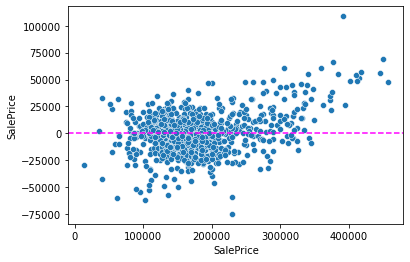

In [140]:
sns.scatterplot(x=y_test,y=test_res_Ridge_bestAlpha)
plt.axhline(y=0,color='magenta',linestyle='--')

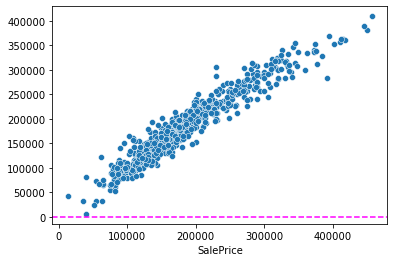

In [141]:
sns.scatterplot(x=y_test,y=ridge_bestAlpha_test_predictions)
plt.axhline(y=0,color='magenta',linestyle='--')

Probability Plot

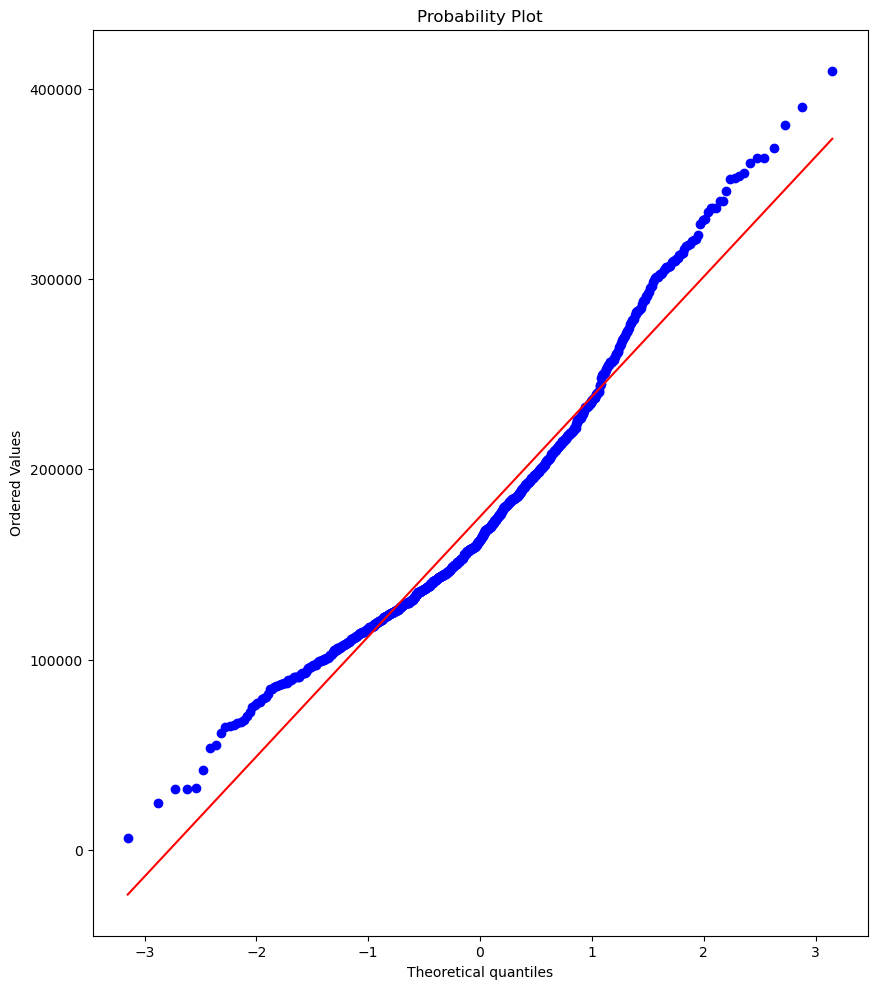

In [142]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(ridge_bestAlpha_test_predictions,plot=ax)

Distribution Plot

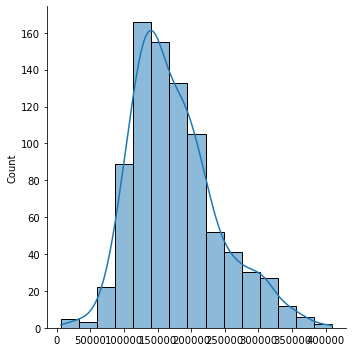

In [143]:
sns.displot(ridge_bestAlpha_test_predictions,bins=15,kde=True)

Percentage error

In [144]:
100*RMSE_Ridge_bestAlpha/df['SalePrice'].mean()

10.913184739739707

In [145]:
yhat_test_ridge_bestAlpha = ridge_bestAlpha_model.predict(X)

<AxesSubplot:ylabel='SalePrice'>

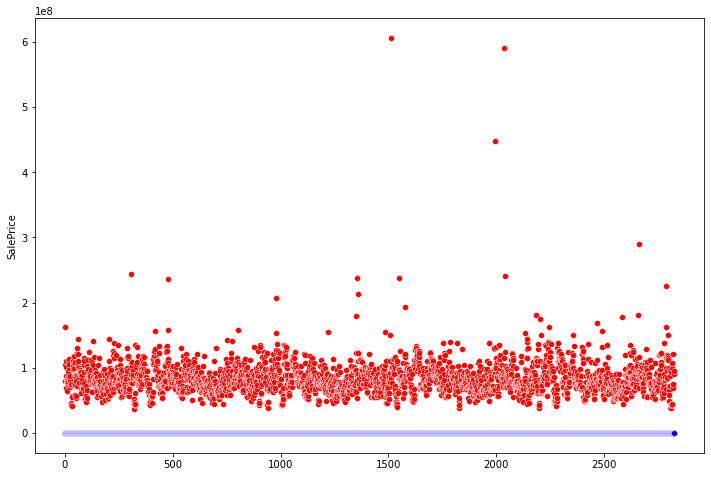

In [146]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(yhat_test_ridge_bestAlpha)),y=yhat_test_ridge_bestAlpha,color='red')
sns.scatterplot(x=range(len(y)),y=y,color='blue')

<AxesSubplot:ylabel='SalePrice'>

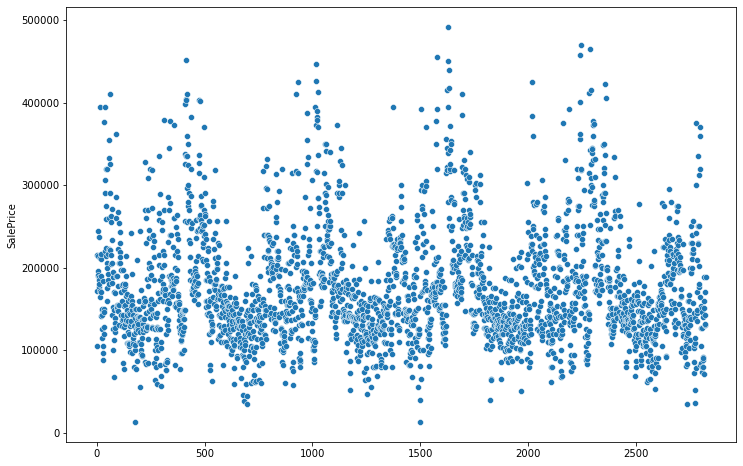

In [147]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(y)),y=y)

In [148]:
ridge_bestAlpha_model.coef_

array([-3.27665001e+03,  2.04068255e+03,  3.27316629e+03,  9.10662238e+02,
        1.65079985e+02, -7.24771420e+02,  9.68827705e+03,  3.99561259e+03,
        7.13970281e+03,  9.87815373e+02,  3.82689911e+03,  3.64220334e+03,
        1.47151569e+02,  3.46461727e+03, -2.12032829e+03,  3.91196580e+03,
        6.95932814e+02,  5.89910106e+03,  3.46388629e+02,  3.55662081e+02,
       -1.36797090e+03,  4.88425059e+03,  1.86199335e+03, -6.17925241e+02,
        8.72840086e+03,  5.67105202e+03, -5.51575086e+02,  1.19486783e+04,
        1.15755772e+03, -3.16100240e+02,  1.01915375e+03,  1.74938412e+03,
       -2.50599555e+03, -1.76424485e+03,  3.92087135e+03,  1.85531556e+03,
        8.05887319e+02,  1.24672638e+03, -8.42379326e+02,  1.16500799e+03,
        2.59745840e+03,  4.02823316e+03, -7.73063898e+02, -5.37621630e+00,
        3.08214899e+02,  1.77274424e+03,  1.47993912e+03,  9.98800743e+02,
        8.70067605e+00,  1.61737189e+03,  1.28594188e+01,  2.52415823e+02,
        2.84532239e+01, -

In [149]:
x = ridge_bestAlpha_model.coef_
x[x>0]

array([2.04068255e+03, 3.27316629e+03, 9.10662238e+02, 1.65079985e+02,
       9.68827705e+03, 3.99561259e+03, 7.13970281e+03, 9.87815373e+02,
       3.82689911e+03, 3.64220334e+03, 1.47151569e+02, 3.46461727e+03,
       3.91196580e+03, 6.95932814e+02, 5.89910106e+03, 3.46388629e+02,
       3.55662081e+02, 4.88425059e+03, 1.86199335e+03, 8.72840086e+03,
       5.67105202e+03, 1.19486783e+04, 1.15755772e+03, 1.01915375e+03,
       1.74938412e+03, 3.92087135e+03, 1.85531556e+03, 8.05887319e+02,
       1.24672638e+03, 1.16500799e+03, 2.59745840e+03, 4.02823316e+03,
       3.08214899e+02, 1.77274424e+03, 1.47993912e+03, 9.98800743e+02,
       8.70067605e+00, 1.61737189e+03, 1.28594188e+01, 2.52415823e+02,
       2.84532239e+01, 6.97422728e+02, 1.02930481e+03, 4.35127882e+02,
       1.87217860e+02, 1.65753920e+03, 1.33302317e+03, 4.14610825e+00,
       2.60313306e+02, 1.24129055e+03, 8.15841023e+02, 6.97429228e+01,
       2.26693110e+03, 5.65156996e+02, 2.00049110e+03, 1.49743369e+02,
      

### Lasso with best alpha

In [150]:
from sklearn.linear_model import Lasso

In [151]:
lasso_model_bestAlpha = Lasso(alpha=100)

In [152]:
lasso_model_bestAlpha.fit(X_train,y_train)

Lasso(alpha=100)

In [153]:
pred_test_lasso_bestAlpha = lasso_model_bestAlpha.predict(X_test)

In [154]:
MAE_Lasso_bestAlpha = mean_absolute_error(y_test,pred_test_lasso_bestAlpha)
MSE_Lasso_bestAlpha = mean_squared_error(y_test,pred_test_lasso_bestAlpha)
RMSE_Lasso_bestAlpha = np.sqrt(MSE_Lasso_bestAlpha)

In [155]:
MAE_Lasso_bestAlpha

13962.125364218424

In [156]:
MSE_Lasso_bestAlpha

360026849.9548724

In [157]:
RMSE_Lasso_bestAlpha

18974.37350625502

In [158]:
test_res_Lasso_bestAlpha = y_test - pred_test_lasso_bestAlpha

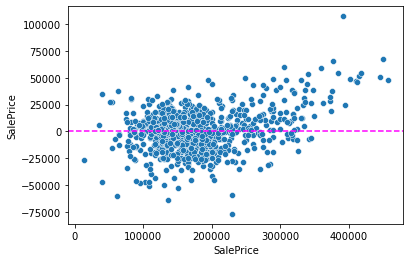

In [159]:
sns.scatterplot(x=y_test,y=test_res_Lasso_bestAlpha)
plt.axhline(y=0,color='magenta',linestyle='--')

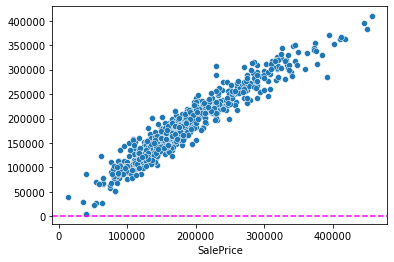

In [160]:
sns.scatterplot(x=y_test,y=pred_test_lasso_bestAlpha)
plt.axhline(y=0,color='magenta',linestyle='--')

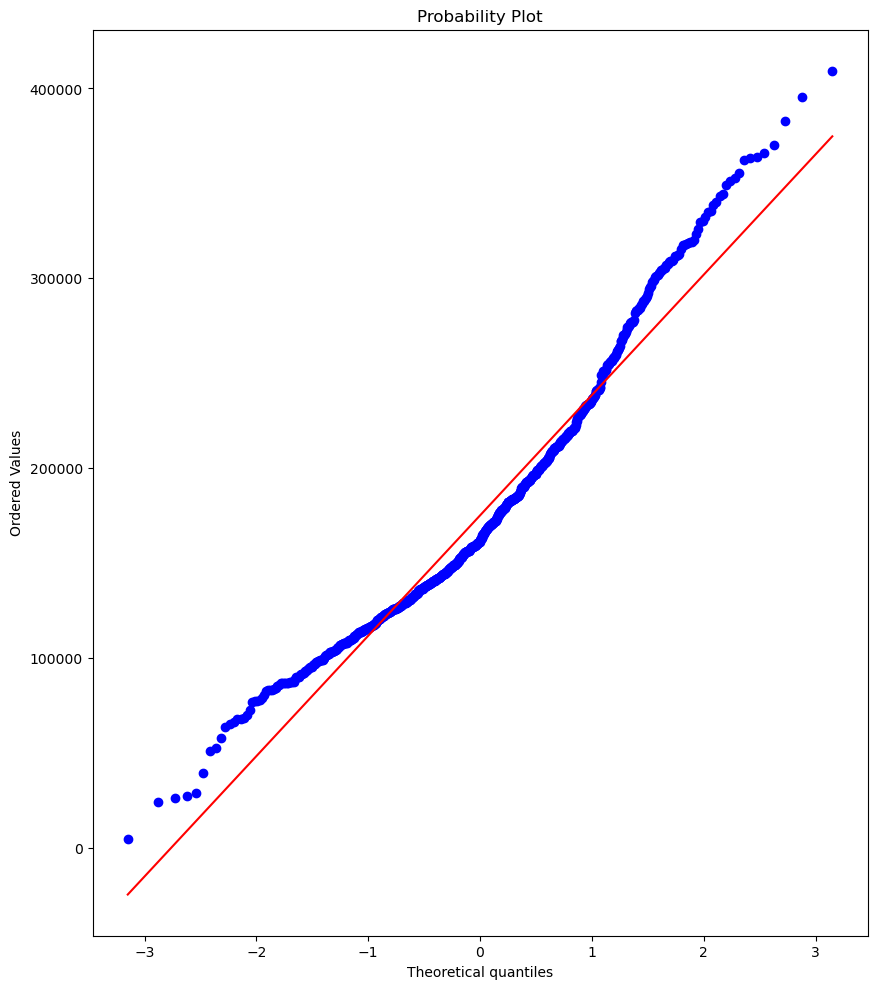

In [161]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_lasso_bestAlpha,plot=ax)

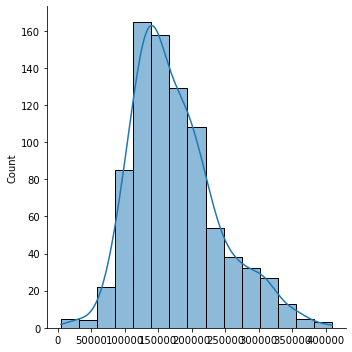

In [162]:
sns.displot(pred_test_lasso_bestAlpha,bins=15,kde=True)

In [163]:
100*RMSE_Lasso_bestAlpha/df['SalePrice'].mean()

10.849823169365253

In [164]:
lasso_model_bestAlpha.coef_

array([-3.35434973e+03,  1.74926884e+03,  3.23989119e+03,  7.47477936e+02,
        0.00000000e+00, -5.37376261e+02,  1.06136893e+04,  4.61470431e+03,
        1.04176027e+04,  3.97461280e+02,  3.79710221e+03,  3.50042929e+03,
        0.00000000e+00,  3.18232598e+03, -2.13739349e+03,  4.04830270e+03,
        1.43547698e+02,  7.89256481e+03,  4.05538674e+02,  8.55901488e+02,
       -0.00000000e+00,  2.67910593e+03,  1.80422794e+03, -7.15763457e+02,
        3.14308661e+03,  0.00000000e+00, -1.12597582e+03,  2.30091984e+04,
        9.91473893e+02, -2.25766497e+02,  0.00000000e+00,  1.02001845e+03,
       -2.99360839e+03, -1.52911201e+03,  3.75144592e+03,  6.27368338e+02,
        4.40592077e+02,  9.91818824e+02, -0.00000000e+00,  8.92975112e+02,
        2.28693569e+03,  3.68332531e+03, -7.79102872e+02, -0.00000000e+00,
        0.00000000e+00,  1.58588198e+03,  1.25890798e+03,  1.03162521e+03,
       -7.85032859e+00,  1.53123563e+03, -0.00000000e+00,  9.90349393e+01,
        0.00000000e+00, -

In [165]:
x = lasso_model_bestAlpha.coef_
x[x>0]

array([1.74926884e+03, 3.23989119e+03, 7.47477936e+02, 1.06136893e+04,
       4.61470431e+03, 1.04176027e+04, 3.97461280e+02, 3.79710221e+03,
       3.50042929e+03, 3.18232598e+03, 4.04830270e+03, 1.43547698e+02,
       7.89256481e+03, 4.05538674e+02, 8.55901488e+02, 2.67910593e+03,
       1.80422794e+03, 3.14308661e+03, 2.30091984e+04, 9.91473893e+02,
       1.02001845e+03, 3.75144592e+03, 6.27368338e+02, 4.40592077e+02,
       9.91818824e+02, 8.92975112e+02, 2.28693569e+03, 3.68332531e+03,
       1.58588198e+03, 1.25890798e+03, 1.03162521e+03, 1.53123563e+03,
       9.90349393e+01, 3.99093484e+02, 7.48927476e+02, 2.83276435e+02,
       1.83152641e+03, 1.20430969e+03, 1.91765382e+02, 1.43412609e+03,
       1.14685487e+03, 5.01656978e+01, 2.47969833e+03, 3.74337030e+02,
       1.88962059e+03, 1.52654984e+02, 1.41364691e+03, 2.43427494e+03,
       5.90957305e+03, 3.14329204e+02, 1.45776405e+03, 2.90417319e+03,
       4.98604482e+02, 3.47939081e+02, 3.10627605e+03, 7.66263163e+02,
      

### ElasticNet GridSearchCV

In [166]:
from sklearn.linear_model import ElasticNet

In [167]:
base_elastic_model = ElasticNet()

In [168]:
param_grid = {'alpha':[0.1,1,5,10,50,100],'l1_ratio':[0.1,0.5,0.7,0.9,0.95,1]}

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
elastic_grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=140,verbose=2)

In [171]:
elastic_grid_model.fit(X_train,y_train)

Fitting 140 folds for each of 36 candidates, totalling 5040 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .

[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] a

[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .

[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .

[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .

[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .

[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .

[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .

[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .

[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.9, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.9 .........................................
[CV] .

[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] .

[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] ......................... alpha=0.1, l1_ratio=0.95, total=   0.2s
[CV] alpha=0.1, l1_ratio=0.95 ........................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295079393933.29694, tolerance: 945824885.8310143
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292089870790.82654, tolerance: 941412386.8535358
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295606380690.75696, tolerance: 949023005.0791614
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294830817019.586, tolerance: 946684650.9805152
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296296167392.1945, tolerance: 946631666.3724254
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296238899152.38336, tolerance: 943830802.8175381
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292877415067.82404, tolerance: 941987950.2889141
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295852921322.74457, tolerance: 946088279.0738016
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294745437219.03845, tolerance: 944661714.6165376
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294592833299.39246, tolerance: 948596678.995591
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297624252491.71747, tolerance: 949225325.8148571
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297523646921.5261, tolerance: 950333145.6376497
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294856933666.492, tolerance: 948983080.2683742
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294087894887.65045, tolerance: 938985368.297061
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296699510164.16144, tolerance: 949777375.2416664
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294443483390.323, tolerance: 948528896.7020475
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293627479914.3927, tolerance: 948799843.1127676
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296247866184.5637, tolerance: 946578368.9115454
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297754051150.5864, tolerance: 946245281.4622707
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296774251679.09875, tolerance: 941523717.5529772
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296414566309.4594, tolerance: 940592004.0717989
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294039377103.2841, tolerance: 939698217.997597
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296315961576.64276, tolerance: 946965028.5247496
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294542691393.1919, tolerance: 947607441.6954854
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296366476218.80865, tolerance: 946215013.759954
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294803565916.82904, tolerance: 947017366.192946
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296790731614.7079, tolerance: 949019547.6970868
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295134013886.015, tolerance: 947653652.0096728
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287624123997.335, tolerance: 942290725.979065
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294181136913.0768, tolerance: 944091166.5844258
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296319267029.2036, tolerance: 948629902.6370931
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297563413752.2307, tolerance: 950916406.7274262
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291833430434.4326, tolerance: 943112582.5393493
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297069925591.6479, tolerance: 949092891.8952024
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297376989774.0476, tolerance: 940285606.5653778
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296627564410.3117, tolerance: 943646333.6650298
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293223896975.105, tolerance: 947090016.6865953
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295828399758.8421, tolerance: 949469580.3898053
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297838798922.44775, tolerance: 945462609.9569067
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295769796705.9212, tolerance: 947560742.8965807
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293537823072.7723, tolerance: 949029695.4900091
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294651072339.9669, tolerance: 949071435.8654803
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296464544982.47504, tolerance: 942318562.2552024
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287676986594.557, tolerance: 940706244.2489175
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296529082812.2468, tolerance: 948215957.3732493
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296524995750.33594, tolerance: 947731914.2472684
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291478789563.2087, tolerance: 938349407.343049
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296183872308.1776, tolerance: 948463161.7869824
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296757838307.9584, tolerance: 947550853.7190973
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293507636456.36664, tolerance: 949168790.152261
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298674080328.9483, tolerance: 948677646.2770953
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294182822858.53125, tolerance: 937263819.1901876
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297021977784.8402, tolerance: 944361825.8124746
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295461121848.2986, tolerance: 948618406.3697442
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294058028132.3657, tolerance: 950398664.8170285
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294433036792.35736, tolerance: 943574361.7396126
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296574184289.40643, tolerance: 948807600.3719246
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291215084074.20013, tolerance: 944138600.5280043
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296674122515.29895, tolerance: 950306168.3911815
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296487091360.78107, tolerance: 950127638.4284934
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296807578468.8796, tolerance: 949157002.0209311
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298287897776.2569, tolerance: 947332995.8556731
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298298797255.3301, tolerance: 948684551.8578645
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296117702516.2045, tolerance: 946978299.2094903
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292493379076.64325, tolerance: 947384991.7194539
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287020989604.5134, tolerance: 937343339.1926528
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295282986657.4204, tolerance: 948565925.0532416
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292201393714.85876, tolerance: 948280216.461153
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297561533909.6807, tolerance: 944788405.9020188
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304719860253.3629, tolerance: 931959923.970893
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294769391860.5589, tolerance: 949545737.73615
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296381580994.38605, tolerance: 945671361.4829792
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294003572366.62463, tolerance: 948598217.3000432
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297297721208.92474, tolerance: 947419316.5888629
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296204805897.7206, tolerance: 947008687.9737074
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297685013822.5227, tolerance: 948409891.912118
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293489377249.8772, tolerance: 943460533.0692524
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296868166498.07587, tolerance: 948782930.623451
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296075024154.4631, tolerance: 945951603.2849656
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294709995897.7015, tolerance: 949642975.9189829
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298160025944.24774, tolerance: 947503606.975809
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294971032903.5937, tolerance: 943248573.5390159
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296162076385.12604, tolerance: 947600331.4249961
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295705813526.4671, tolerance: 946660768.8178505
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295136401671.63806, tolerance: 946623748.7980454
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295449751465.47394, tolerance: 939452824.9292166
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293889453708.5913, tolerance: 945001923.4608446
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295532157145.84924, tolerance: 949880289.5270442
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290824698391.38965, tolerance: 943152264.0719247
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296084458173.68134, tolerance: 944965406.1778338
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 291860215926.86194, tolerance: 946548811.4801645
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296847208743.34155, tolerance: 940757564.9432696
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24098419112.740112, tolerance: 945198759.2082801
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295696751187.13544, tolerance: 946183837.2198106
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297300370030.3318, tolerance: 949477561.6382009
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295404830652.17755, tolerance: 945114977.9436934
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297380089225.11707, tolerance: 946502257.2750919
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296381913023.444, tolerance: 941924439.383826
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294478635004.7364, tolerance: 942228891.0370985
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290465419048.75287, tolerance: 933642924.3394028
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296258141786.92114, tolerance: 949626446.8487457
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295665576687.7164, tolerance: 950915763.6470901
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295251262705.36487, tolerance: 949266314.5203199
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296937041799.3954, tolerance: 950003609.5516033
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296353968994.69226, tolerance: 946646969.2465398
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296589778784.8363, tolerance: 946777704.2207783
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295739671698.12384, tolerance: 947988631.9646907
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293063409234.5974, tolerance: 947480213.262653
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296420228357.58203, tolerance: 947431598.5611626
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296064400489.8816, tolerance: 949233276.4230504
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203537748455.4256, tolerance: 946008379.842276
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294785488201.90094, tolerance: 949869913.7632695
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295614637437.7581, tolerance: 947192154.0085012
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295105314122.3646, tolerance: 940357142.6170577
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296581557865.8193, tolerance: 948671749.8194537
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295608564322.2184, tolerance: 945476386.5812798
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295404657752.1419, tolerance: 949451004.365786
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297292913083.97614, tolerance: 947299061.674752
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295863546754.9031, tolerance: 946172238.7200652
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294679976155.01447, tolerance: 946665709.8454114
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289896324169.0957, tolerance: 945056842.510375
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27262818261.407837, tolerance: 948746654.8894259
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294219199618.2439, tolerance: 948075806.582338
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296931022237.65137, tolerance: 947059745.2747774
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296599330470.6268, tolerance: 949970521.2196066
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296994264920.291, tolerance: 946605748.9483805
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 297104623737.3373, tolerance: 948806956.2795912
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295756565197.46967, tolerance: 943148723.7697848
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295281484100.0877, tolerance: 947121110.2870903
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294351633385.96405, tolerance: 941472549.6700653
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294835285834.4777, tolerance: 949034616.032011
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295626065047.54407, tolerance: 945654500.1390922
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292577840548.0673, tolerance: 946249807.9645126
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296261205713.4346, tolerance: 948158145.1982491
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295260648221.7679, tolerance: 941809154.897243
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296634598088.815, tolerance: 944320191.3196577
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292999196997.40454, tolerance: 949619680.6392703
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.2s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296905891174.2527, tolerance: 941408053.418766
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296562489086.5245, tolerance: 947256805.3901238
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=0.1, l1_ratio=1 ...........................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290284147753.24646, tolerance: 949945608.9864407
  positive)


[CV] ............................ alpha=0.1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.1, total=   0.0s
[CV] alpha=1, l1_ratio=0.1 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.1s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.9, total=   0.0s
[CV] alpha=1, l1_ratio=0.9 ...........................................
[CV] .

[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] .

[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=1, l1_ratio=0.95, total=   0.0s
[CV] alpha=1, l1_ratio=0.95 ..........................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138909603846.78546, tolerance: 945824885.8310143
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113490217890.73303, tolerance: 941412386.8535358
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130033134190.80869, tolerance: 949023005.0791614
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131174445505.35327, tolerance: 946684650.9805152
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138525046462.4854, tolerance: 946631666.3724254
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142174197950.31232, tolerance: 943830802.8175381
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131172877265.27869, tolerance: 941987950.2889141
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138699610356.0392, tolerance: 946088279.0738016
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128248624935.06668, tolerance: 944661714.6165376
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131771154922.961, tolerance: 948596678.995591
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135557109316.1213, tolerance: 949225325.8148571
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136870306108.08505, tolerance: 950333145.6376497
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121860612539.36868, tolerance: 948983080.2683742
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128112612378.96286, tolerance: 938985368.297061
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137559508017.26398, tolerance: 949777375.2416664
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119917704728.96112, tolerance: 948528896.7020475
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121196317586.2909, tolerance: 948799843.1127676
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130602830536.73343, tolerance: 946578368.9115454
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141922778077.8558, tolerance: 946245281.4622707
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134733533762.20898, tolerance: 941523717.5529772
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138103058210.8434, tolerance: 940592004.0717989
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152125461556.2552, tolerance: 939698217.997597
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134224190279.59268, tolerance: 946965028.5247496
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137608323635.17795, tolerance: 947607441.6954854
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137046337892.90057, tolerance: 946215013.759954
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127827848317.70328, tolerance: 947017366.192946
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133030501625.969, tolerance: 949019547.6970868
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127045204710.71283, tolerance: 947653652.0096728
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100626841526.01111, tolerance: 942290725.979065
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129881884445.81366, tolerance: 944091166.5844258
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134435674455.43265, tolerance: 948629902.6370931
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153365950499.33307, tolerance: 950916406.7274262
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123003604414.48895, tolerance: 943112582.5393493
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137717451098.23944, tolerance: 949092891.8952024
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144123444326.7403, tolerance: 940285606.5653778
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138036560564.54712, tolerance: 943646333.6650298
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121117337409.00699, tolerance: 947090016.6865953
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139282037260.9493, tolerance: 949469580.3898053
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152411246006.42566, tolerance: 945462609.9569067
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135193809354.75266, tolerance: 947560742.8965807
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134000416536.39163, tolerance: 949029695.4900091
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129761166635.75519, tolerance: 949071435.8654803
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140304209085.9145, tolerance: 942318562.2552024
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141605011283.4716, tolerance: 940706244.2489175
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135730063744.7532, tolerance: 948215957.3732493
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130182109000.48569, tolerance: 947731914.2472684
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111911194183.12085, tolerance: 938349407.343049
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145934550929.91916, tolerance: 948463161.7869824
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142273522454.0688, tolerance: 947550853.7190973
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146360091920.80884, tolerance: 949168790.152261
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147378476324.8661, tolerance: 948677646.2770953
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135157503281.9758, tolerance: 937263819.1901876
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139732252905.28738, tolerance: 944361825.8124746
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134412476896.1781, tolerance: 948618406.3697442
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129383914630.01282, tolerance: 950398664.8170285
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117226341321.83923, tolerance: 943574361.7396126
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132940109025.99963, tolerance: 948807600.3719246
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110657371940.72696, tolerance: 944138600.5280043
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132422845832.42804, tolerance: 950306168.3911815
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131936691360.594, tolerance: 950127638.4284934
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139065675672.10452, tolerance: 949157002.0209311
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146871667241.737, tolerance: 947332995.8556731
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157185687857.7704, tolerance: 948684551.8578645
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130868977538.67844, tolerance: 946978299.2094903
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125744970267.48224, tolerance: 947384991.7194539
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109619265217.55826, tolerance: 937343339.1926528
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134995261725.8386, tolerance: 948565925.0532416
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117289519621.23785, tolerance: 948280216.461153
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140533315131.25015, tolerance: 944788405.9020188
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199693945357.40778, tolerance: 931959923.970893
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123530125007.37369, tolerance: 949545737.73615
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133361711876.88828, tolerance: 945671361.4829792
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129034632756.37311, tolerance: 948598217.3000432
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136084354917.88925, tolerance: 947419316.5888629
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134093643802.1156, tolerance: 947008687.9737074
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141264948798.39066, tolerance: 948409891.912118
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123510126633.01056, tolerance: 943460533.0692524
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131358315276.52539, tolerance: 948782930.623451
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136889800171.09073, tolerance: 945951603.2849656
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130250210019.93924, tolerance: 949642975.9189829
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145133061431.84796, tolerance: 947503606.975809
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146385971547.87704, tolerance: 943248573.5390159
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131973874080.85245, tolerance: 947600331.4249961
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137147238702.7153, tolerance: 946660768.8178505
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135319367815.19617, tolerance: 946623748.7980454
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133521952709.68924, tolerance: 939452824.9292166
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143970648407.71738, tolerance: 945001923.4608446
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132656760158.21564, tolerance: 949880289.5270442
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116891838644.96902, tolerance: 943152264.0719247
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132195360979.23203, tolerance: 944965406.1778338
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114728789203.14438, tolerance: 946548811.4801645
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136183754092.00793, tolerance: 940757564.9432696
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6220352201.690186, tolerance: 945198759.2082801
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130975891481.70822, tolerance: 946183837.2198106
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133340087214.01971, tolerance: 949477561.6382009
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129705326458.80414, tolerance: 945114977.9436934
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145252370790.04785, tolerance: 946502257.2750919
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135581011666.85315, tolerance: 941924439.383826
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135094764798.83517, tolerance: 942228891.0370985
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132588940832.77441, tolerance: 933642924.3394028
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133688477121.83441, tolerance: 949626446.8487457
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125990501393.3533, tolerance: 950915763.6470901
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136665207616.38477, tolerance: 949266314.5203199
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142180842166.3831, tolerance: 950003609.5516033
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134265908238.22382, tolerance: 946646969.2465398
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129686028700.60837, tolerance: 946777704.2207783
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136712049805.08527, tolerance: 947988631.9646907
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121580349394.90356, tolerance: 947480213.262653
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136531902024.04068, tolerance: 947431598.5611626
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131875763537.84525, tolerance: 949233276.4230504
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................
[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137758563424.6584, tolerance: 949869913.7632695
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130422510626.56686, tolerance: 947192154.0085012
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167957358975.44666, tolerance: 940357142.6170577
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134172198795.6908, tolerance: 948671749.8194537
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131463554359.86609, tolerance: 945476386.5812798
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132952325625.09097, tolerance: 949451004.365786
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139569307688.2702, tolerance: 947299061.674752
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129792475998.71896, tolerance: 946172238.7200652
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116963754602.04239, tolerance: 946665709.8454114
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113594381828.68713, tolerance: 945056842.510375
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5134797783.09729, tolerance: 948746654.8894259
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116880654296.37561, tolerance: 948075806.582338
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140301717775.36053, tolerance: 947059745.2747774
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134903152411.28705, tolerance: 949970521.2196066
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133740083840.62341, tolerance: 946605748.9483805
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136634273397.68094, tolerance: 948806956.2795912
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128091554258.02057, tolerance: 943148723.7697848
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131948751183.92123, tolerance: 947121110.2870903
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133944528293.9602, tolerance: 941472549.6700653
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129633787373.73938, tolerance: 949034616.032011
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125648987136.97672, tolerance: 945654500.1390922
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114091819046.36465, tolerance: 946249807.9645126
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129335762209.59659, tolerance: 948158145.1982491
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133765361819.05319, tolerance: 941809154.897243
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.2s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139564542074.4225, tolerance: 944320191.3196577
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110485975386.25671, tolerance: 949619680.6392703
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137013589263.66074, tolerance: 941408053.418766
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137735017710.73563, tolerance: 947256805.3901238
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=1, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108076341607.05106, tolerance: 949945608.9864407
  positive)


[CV] .............................. alpha=1, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.1, total=   0.0s
[CV] alpha=5, l1_ratio=0.1 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.5, total=   0.0s
[CV] alpha=5, l1_ratio=0.5 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.7 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] .

[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] .

[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2763935084.940796, tolerance: 941412386.8535358
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4047816325.6239014, tolerance: 948983080.2683742
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5739108916.432739, tolerance: 938985368.297061
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3824285240.490967, tolerance: 948528896.7020475
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3857148676.8205566, tolerance: 948799843.1127676
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5669252473.941895, tolerance: 947017366.192946
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5308385647.720825, tolerance: 947653652.0096728
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1498081921.0354004, tolerance: 942290725.979065
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4068260525.8668213, tolerance: 947090016.6865953
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2684104849.809326, tolerance: 938349407.343049
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3510529824.398926, tolerance: 943574361.7396126
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2740151500.3598633, tolerance: 944138600.5280043
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2716980367.545288, tolerance: 937343339.1926528
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3452157402.2252197, tolerance: 948280216.461153
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4611040197.654419, tolerance: 949545737.73615
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5060992921.618042, tolerance: 943460533.0692524
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1647482344.3427734, tolerance: 948782930.623451
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3265819378.2990723, tolerance: 943152264.0719247
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3061657731.307617, tolerance: 946548811.4801645
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3643242986.7458496, tolerance: 950915763.6470901
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4153827855.507202, tolerance: 947480213.262653
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6375159322.53302, tolerance: 947192154.0085012
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3576721206.3875732, tolerance: 946665709.8454114
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3007209335.1086426, tolerance: 945056842.510375
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3424255367.562622, tolerance: 948075806.582338
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5569501594.570557, tolerance: 943148723.7697848
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8158236179.621094, tolerance: 941472549.6700653
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2910683994.802002, tolerance: 946249807.9645126
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2276606534.804077, tolerance: 949619680.6392703
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.2s
[CV] alpha=5, l1_ratio=1 .............................................
[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=5, l1_ratio=1 .............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2762123323.6452637, tolerance: 949945608.9864407
  positive)


[CV] .............................. alpha=5, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.1, total=   0.0s
[CV] alpha=10, l1_ratio=0.1 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.5, total=   0.0s
[CV] alpha=10, l1_ratio=0.5 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] .

[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] .

[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .

[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .

[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .......................... alpha=10, l1_ratio=0.95, total=   0.0s
[CV] alpha=10, l1_ratio=0.95 .........................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996348111.6303711, tolerance: 946684650.9805152
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993657702.8562012, tolerance: 941987950.2889141
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1001166750.6948242, tolerance: 944661714.6165376
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 998248774.8165283, tolerance: 938985368.297061
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014374607.9737549, tolerance: 946578368.9115454
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1035560792.2946777, tolerance: 942290725.979065
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993295168.3452148, tolerance: 944091166.5844258
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 940941267.8574219, tolerance: 940706244.2489175
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1002289922.5797119, tolerance: 944361825.8124746
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999852614.7182617, tolerance: 943574361.7396126
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 982040558.6026611, tolerance: 949157002.0209311
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 986674617.395874, tolerance: 946978299.2094903
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 983934794.0228271, tolerance: 947384991.7194539
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987228529.9736328, tolerance: 949545737.73615
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 996917758.2774658, tolerance: 947419316.5888629
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993414575.5982666, tolerance: 947503606.975809
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 986194691.5820312, tolerance: 946623748.7980454
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980712520.3837891, tolerance: 944965406.1778338
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 972836231.6257324, tolerance: 940757564.9432696
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1027327628.581665, tolerance: 949266314.5203199
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 994256658.9204102, tolerance: 946777704.2207783
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987348715.0391846, tolerance: 940357142.6170577
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 995980959.2800293, tolerance: 946665709.8454114
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 981463612.1582031, tolerance: 945056842.510375
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] .

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1006785410.5360107, tolerance: 947121110.2870903
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987440863.4437256, tolerance: 941809154.897243
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................


C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 983351171.2774658, tolerance: 947256805.3901238
  positive)


[CV] ............................. alpha=10, l1_ratio=1, total=   0.2s
[CV] alpha=10, l1_ratio=1 ............................................
[CV] ............................. alpha=10, l1_ratio=1, total=   0.3s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.1, total=   0.0s
[CV] alpha=50, l1_ratio=0.1 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.5, total=   0.0s
[CV] alpha=50, l1_ratio=0.5 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.7, total=   0.0s
[CV] alpha=50, l1_ratio=0.7 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] .

[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] .

[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .

[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .

[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] .

[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] .

[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.2s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .......................... alpha=100, l1_ratio=0.1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .......................... alpha=100, l1_ratio=0.5, total=   0.0s
[CV] alpha=100, l1_ratio=0.5 .........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .......................... alpha=100, l1_ratio=0.7, total=   0.0s
[CV] alpha=100, l1_ratio=0.7 .........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .

[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.9 .........................................
[CV] .......................... alpha=100, l1_ratio=0.9, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] .

[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] .

[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] ......................... alpha=100, l1_ratio=0.95, total=   0.0s
[CV] alpha=100, l1_ratio=0.95 ........................................
[CV] .

[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] .

[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] ............................ alpha=100, l1_ratio=1, total=   0.1s
[CV] alpha=100, l1_ratio=1 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 5040 out of 5040 | elapsed:  5.4min finished


GridSearchCV(cv=140, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [173]:
elastic_grid_model.l1_ratio_

AttributeError: 'GridSearchCV' object has no attribute 'l1_ratio_'

In [174]:
elastic_grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [175]:
elastic_grid_model.best_estimator_

ElasticNet(alpha=100, l1_ratio=1)

In [176]:
pd.DataFrame(elastic_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,split50_test_score,split51_test_score,split52_test_score,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,split60_test_score,split61_test_score,split62_test_score,split63_test_score,split64_test_score,split65_test_score,split66_test_score,split67_test_score,split68_test_score,split69_test_score,split70_test_score,split71_test_score,split72_test_score,split73_test_score,split74_test_score,split75_test_score,split76_test_score,split77_test_score,split78_test_score,split79_test_score,split80_test_score,split81_test_score,split82_test_score,split83_test_score,split84_test_score,split85_test_score,split86_test_score,split87_test_score,split88_test_score,split89_test_score,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,split100_test_score,split101_test_score,split102_test_score,split103_test_score,split104_test_score,split105_test_score,split106_test_score,split107_test_score,split108_test_score,split109_test_score,split110_test_score,split111_test_score,split112_test_score,split113_test_score,split114_test_score,split115_test_score,split116_test_score,split117_test_score,split118_test_score,split119_test_score,split120_test_score,split121_test_score,split122_test_score,split123_test_score,split124_test_score,split125_test_score,split126_test_score,split127_test_score,split128_test_score,split129_test_score,split130_test_score,split131_test_score,split132_test_score,split133_test_score,split134_test_score,split135_test_score,split136_test_score,split137_test_score,split138_test_score,split139_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049824,0.004938,0.000548,0.000496,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-5.145959e+08,-4.655518e+08,-2.845601e+08,-4.805793e+08,-3.259187e+08,-4.870701e+08,-7.608982e+08,-8.554611e+08,-4.235149e+08,-4.340184e+08,-5.344914e+07,-1.162634e+08,-1.929203e+08,-5.369798e+08,-1.896750e+08,-1.634036e+08,-3.245510e+08,-2.140955e+08,-2.107552e+08,-2.104768e+08,-3.514568e+08,-1.013798e+09,-2.456951e+08,-6.157068e+08,-3.132034e+08,-3.363108e+08,-1.745138e+08,-3.046182e+08,-1.163569e+09,-5.829897e+08,-2.920480e+08,-4.529823e+08,-6.182386e+08,-2.145121e+08,-3.289325e+08,-3.076298e+08,-4.990060e+08,-4.171053e+08,-4.406677e+08,-4.045548e+08,-8.490425e+08,-4.054776e+08,-6.380298e+08,-1.826993e+09,-2.128374e+08,-2.540109e+08,-5.727859e+08,-4.812626e+08,-3.333632e+08,-1.051164e+09,-1.603304e+08,-7.214287e+08,-3.434476e+08,-4.178015e+08,-5.007381e+08,-1.632786e+08,-2.021632e+08,-3.804566e+08,-1.660099e+08,-1.453760e+08,-2.427967e+08,-2.561565e+08,-4.149262e+08,-2.972436e+08,-9.537461e+08,-1.294833e+09,-4.122901e+08,-5.270447e+08,-1.865099e+08,-4.172827e+08,-3.261905e+08,-3.973544e+08,-5.844637e+08,-1.108514e+08,-2.611072e+08,-1.437129e+08,-6.095953e+08,-9.535709e+0

In [177]:
y_pred = elastic_grid_model.predict(X_test)

In [178]:
mean_squared_error(y_test,y_pred)

360026849.9548724

In [179]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

18974.37350625502

In [180]:
elastic_grid_model.coef_

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [181]:
test_prob = y_test - y_pred

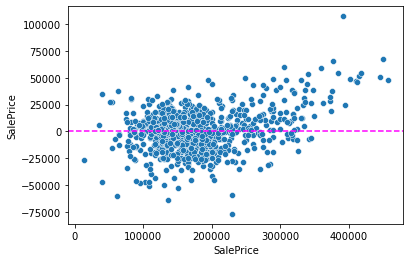

In [182]:
sns.scatterplot(x=y_test,y=test_prob)
plt.axhline(y=0,color='magenta',linestyle='--')

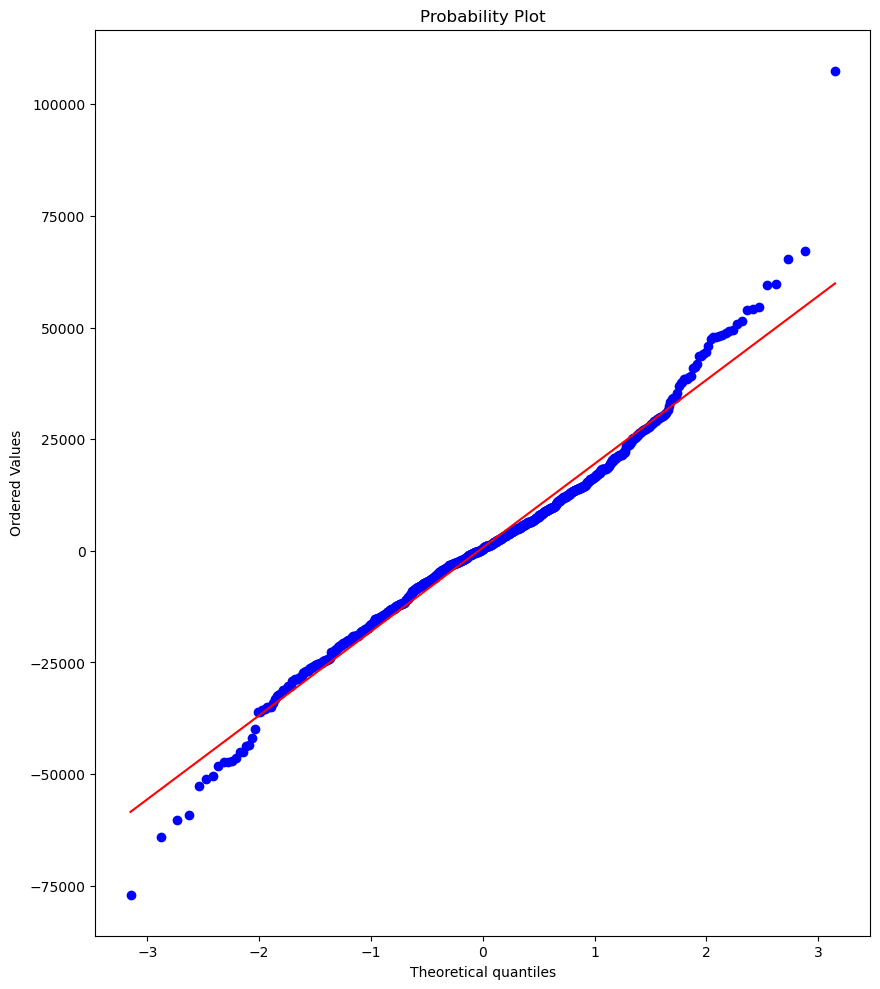

In [183]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_prob,plot=ax)

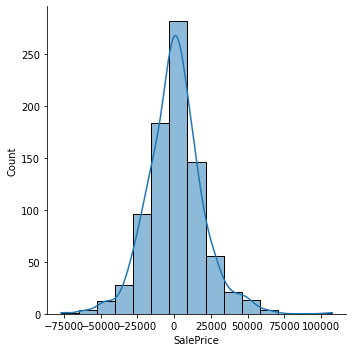

In [184]:
sns.displot(test_prob,bins=15,kde=True)

In [185]:
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2820    142500
2821    131000
2822    132000
2823    170000
2824    188000
Name: SalePrice, Length: 2825, dtype: int64

In [186]:
100*RMSE/df['SalePrice'].mean()

10.849823169365253

In [187]:
y_hat = elastic_grid_model.predict(X)

<AxesSubplot:ylabel='SalePrice'>

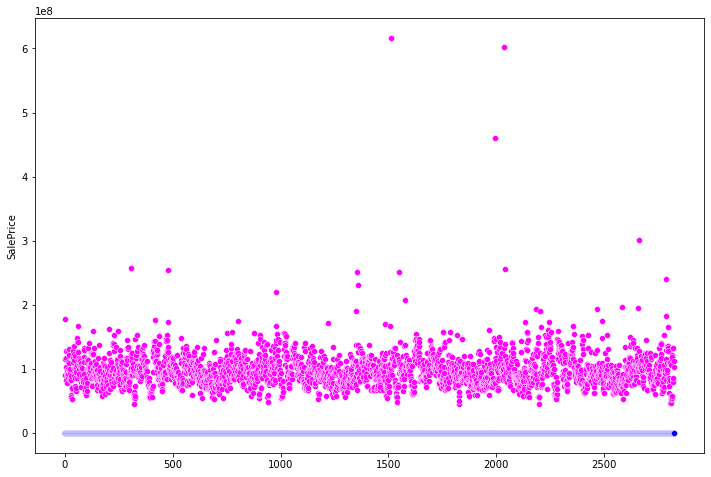

In [188]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(y_hat)),y=y_hat,color='magenta')
sns.scatterplot(x=range(len(y)),y=y,color='blue')

<AxesSubplot:ylabel='SalePrice'>

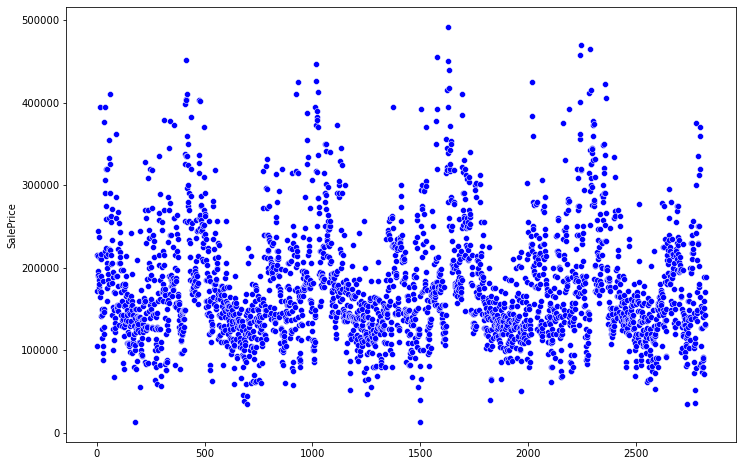

In [189]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x=range(len(y)),y=y,color='blue')

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825 entries, 0 to 2824
Columns: 210 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(11), int64(199)
memory usage: 4.5 MB


In [191]:
df.columns.values

array(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Street', 'Lot Shape',
       'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Fireplace Qu', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_I (all)', 'MS Zo

simple linear reg / polynomial

### ElasticNetCV

In [192]:
from sklearn.linear_model import ElasticNetCV

In [193]:
ElasticNetCV_model = ElasticNetCV(alphas=[0.1,1,5,10,50,100],l1_ratio=[0.1,0.5,0.7,0.9,0.95,0.99,1.0], tol=0.01)

In [194]:
ElasticNetCV_model.fit(X_train,y_train)

C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146840713398.37903, tolerance: 76290301555.98
  tol, rng, random, positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159325294536.73486, tolerance: 75501076221.43076
  tol, rng, random, positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163345925649.3056, tolerance: 77127441243.09271
  tol, rng, random, positive)
C:\Users\Dell\anaconda3\envs\NSSDC2021\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: C

ElasticNetCV(alphas=[0.1, 1, 5, 10, 50, 100],
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0], tol=0.01)

In [197]:
ElasticNetCV_model.l1_ratio_

1.0

In [198]:
ElasticNetCV_model.best_estimator_

AttributeError: 'ElasticNetCV' object has no attribute 'best_estimator_'

In [199]:
ElasticNetCV_model.best_params_

AttributeError: 'ElasticNetCV' object has no attribute 'best_params_'

In [200]:
ElasticNetCV_model.alpha_

100.0

In [201]:
ElasticNetCV_test_predictions = ElasticNetCV_model.predict(X_test)

In [202]:
MAE_ElasticNetCV = mean_absolute_error(y_test,ElasticNetCV_test_predictions)
MSE_ElasticNetCV = mean_squared_error(y_test,ElasticNetCV_test_predictions)
RMSE_ElasticNetCV = np.sqrt(MSE_ElasticNetCV)

In [203]:
MAE_ElasticNetCV

13973.400544810307

In [204]:
MSE_ElasticNetCV

361256930.010901

In [205]:
RMSE_ElasticNetCV

19006.76011346755

In [206]:
ElasticNetCV_model.coef_

array([-3.39767333e+03,  1.77338726e+03,  3.28897489e+03,  7.44354196e+02,
        0.00000000e+00, -5.33960319e+02,  1.09951902e+04,  4.51810152e+03,
        1.00710369e+04,  4.22034945e+02,  3.72260432e+03,  3.43687156e+03,
        0.00000000e+00,  3.06570468e+03, -2.08660735e+03,  4.03629417e+03,
        1.23605945e+02,  7.92131995e+03,  4.10240265e+02,  8.51100960e+02,
       -0.00000000e+00,  2.46332124e+03,  1.78290999e+03, -7.45970491e+02,
        1.53591189e+04,  1.38244728e+04,  1.46357255e+02,  7.56513083e+03,
        9.94970736e+02, -2.25264179e+02,  0.00000000e+00,  1.02588936e+03,
       -2.93766579e+03, -1.46849506e+03,  3.64212955e+03,  6.23137543e+02,
        4.15111732e+02,  9.49187766e+02, -2.94235510e+02,  7.06928944e+02,
        2.16145015e+03,  3.69332700e+03, -2.60792387e+02, -0.00000000e+00,
        0.00000000e+00,  1.60887177e+03,  1.24295760e+03,  1.03075553e+03,
       -8.85842706e-01,  1.55514671e+03, -0.00000000e+00,  9.34003351e+01,
        0.00000000e+00, -

In [207]:
x = ElasticNetCV_model.coef_
x[x>0]

array([1.77338726e+03, 3.28897489e+03, 7.44354196e+02, 1.09951902e+04,
       4.51810152e+03, 1.00710369e+04, 4.22034945e+02, 3.72260432e+03,
       3.43687156e+03, 3.06570468e+03, 4.03629417e+03, 1.23605945e+02,
       7.92131995e+03, 4.10240265e+02, 8.51100960e+02, 2.46332124e+03,
       1.78290999e+03, 1.53591189e+04, 1.38244728e+04, 1.46357255e+02,
       7.56513083e+03, 9.94970736e+02, 1.02588936e+03, 3.64212955e+03,
       6.23137543e+02, 4.15111732e+02, 9.49187766e+02, 7.06928944e+02,
       2.16145015e+03, 3.69332700e+03, 1.60887177e+03, 1.24295760e+03,
       1.03075553e+03, 1.55514671e+03, 9.34003351e+01, 3.22134075e+02,
       7.58230753e+02, 2.70215694e+02, 1.82090553e+03, 1.20414156e+03,
       1.95812495e+02, 1.38635824e+03, 1.15222028e+03, 1.11586449e+02,
       2.49234254e+03, 4.02722756e+02, 1.86398096e+03, 1.51909935e+02,
       1.41487188e+03, 2.49436387e+03, 5.95096600e+03, 3.65966883e+02,
       1.56620484e+03, 2.90459801e+03, 5.53576867e+02, 3.75923750e+02,
      